## Hello World

# Nigeria Food Price Trend

### PROBLEM STATEMENT
**It can be observed from the previous discussion that global food price fluctuations can cause
famine and large population shift. Hence, Identifying the drivers of global food prices and
predicting future changes in global food prices, could help in understanding food prices and
its causal effects.**

### AIM
**Our research aims to understand and analyze fluctuations in global food prices and pair the
outcome with currency fluctuations, weather patterns, and refugee movements. This will help us
to build an end-to-end analysis and a food price prediction engine that will help the Government
make better decisions on food policy adjustments, International bodies with planning of food aid
programmes, Individuals with planning and productivity in the advent of a potential food price
crisis...**

### OBJECTIVES
**To achieve the above aim, we will:**

● Analyze available datasets to observe and make inferences about changing food prices,
fluctuations, and the trend they follow.

● Attempt to compare their correlation with factors such as currency fluctuation, weather
patterns, and refugee movements.

● Investigate which food item controls the trends of the majority of the food markets.

● Use the best-performed model in predicting food prices and deploying it in a web
application that can predict food prices.

### Nigeria Food Prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Setting display
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 500) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N

In [3]:
nfp = pd.read_csv('wfp_food_prices_nigeria.csv')
nfp_med = pd.read_csv('wfp_food_median_prices_nigeria.csv')

In [4]:
nfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49814 entries, 0 to 49813
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      49814 non-null  object 
 1   cmname    49814 non-null  object 
 2   unit      49814 non-null  object 
 3   category  49814 non-null  object 
 4   price     49814 non-null  float64
 5   currency  49814 non-null  object 
 6   country   49814 non-null  object 
 7   admname   49814 non-null  object 
 8   adm1id    49814 non-null  int64  
 9   mktname   49814 non-null  object 
 10  mktid     49814 non-null  int64  
 11  cmid      49814 non-null  int64  
 12  ptid      49814 non-null  int64  
 13  umid      49814 non-null  int64  
 14  catid     49814 non-null  int64  
 15  sn        49814 non-null  object 
 16  default   0 non-null      float64
dtypes: float64(2), int64(6), object(9)
memory usage: 6.5+ MB


In [5]:
nfp.shape

(49814, 17)

In [6]:
nfp.rename(columns={'cmname':'commodity',
                   'admname':'state',
                   'mktname':'city'},
                   inplace=True)

In [7]:
#datetime_series = pd.Series( pd.date_range("2015-01-15", "2020-05-15", freq="Y"))
#datetime_series
#nfp['year'] = datetime_series.dt.year

In [8]:
nfp.head()

,date,commodity,unit,category,price,currency,country,state,adm1id,city,mktid,cmid,ptid,umid,catid,sn,default
0,15/01/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
1,15/02/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
2,15/03/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
3,15/04/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
4,15/05/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN


In [9]:
nfp['product'] = nfp['commodity'].str.split(' - ', n=2, expand=True)[0]
nfp['type'] = nfp['commodity'].str.split(' - ', expand=True)[1]

In [14]:
nfp['year'] = nfp['date'].str.split('/', n=3, expand=True)[2]
nfp['month'] = nfp['date'].str.split('/', expand=True)[1]

In [15]:
nfp.head()

,date,commodity,unit,category,price,currency,country,state,adm1id,city,mktid,cmid,ptid,umid,catid,sn,default,product,type,year,month
0,15/01/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN,Bread,Retail,2015,01
1,15/02/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN,Bread,Retail,2015,02
2,15/03/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN,Bread,Retail,2015,03
3,15/04/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN,Bread,Retail,2015,04
4,15/05/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN,Bread,Retail,2015,05


In [16]:
nfp['date'] = pd.to_datetime(nfp["date"])
nfp.set_index("date", inplace = True)

In [17]:
nfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
commodity,49814,58,Millet - Wholesale,1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,49814,22,100 KG,12873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,49814,8,cereals and tubers,24466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,49814,NaN,NaN,NaN,4978.63,8854.59,5,187.5,400,7000,90000
currency,49814,1,NGN,49814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,49814,1,Nigeria,49814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,49814,14,Yobe,15400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adm1id,49814,NaN,NaN,NaN,7659.85,17757.9,2211,2216,2226,2240,65710
city,49814,40,Potiskum,2363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mktid,49814,NaN,NaN,NaN,2117.49,318.077,1037,1974,1981,2391,3073


In [18]:
nfp.isnull().sum()

commodity        0
unit             0
category         0
price            0
currency         0
country          0
state            0
adm1id           0
city             0
mktid            0
cmid             0
ptid             0
umid             0
catid            0
sn               0
default      49814
product          0
type             0
year             0
month            0
dtype: int64

In [19]:
nfp.drop(['default', 'adm1id', 'mktid', 'cmid', 'catid', 'ptid', 'umid', 'sn'], axis = 1, inplace = True)

In [20]:
nfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49814 entries, 2015-01-15 to 2020-05-15
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   commodity  49814 non-null  object 
 1   unit       49814 non-null  object 
 2   category   49814 non-null  object 
 3   price      49814 non-null  float64
 4   currency   49814 non-null  object 
 5   country    49814 non-null  object 
 6   state      49814 non-null  object 
 7   city       49814 non-null  object 
 8   product    49814 non-null  object 
 9   type       49814 non-null  object 
 10  year       49814 non-null  object 
 11  month      49814 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.9+ MB


### Univariate Analysis

### Numerical Features

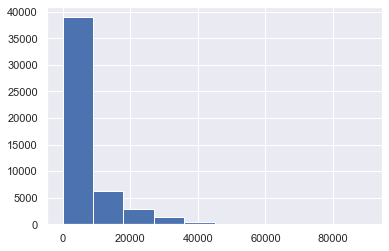

In [22]:
plt.hist(nfp['price']);

### Categorical features

In [23]:
nfp['category'].value_counts()

cereals and tubers       24466
pulses and nuts           8021
vegetables and fruits     5416
meat, fish and eggs       3921
oil and fats              3128
non-food                  2263
miscellaneous food        1611
milk and dairy             988
Name: category, dtype: int64

In [24]:
# %percentage of each category of food
nfp['category'].value_counts(normalize =True)*100

cereals and tubers       49.114707
pulses and nuts          16.101899
vegetables and fruits    10.872445
meat, fish and eggs       7.871281
oil and fats              6.279359
non-food                  4.542900
miscellaneous food        3.234031
milk and dairy            1.983378
Name: category, dtype: float64

**It can be observed from here that cereals and tubers total to about 50% of food category in the market.**

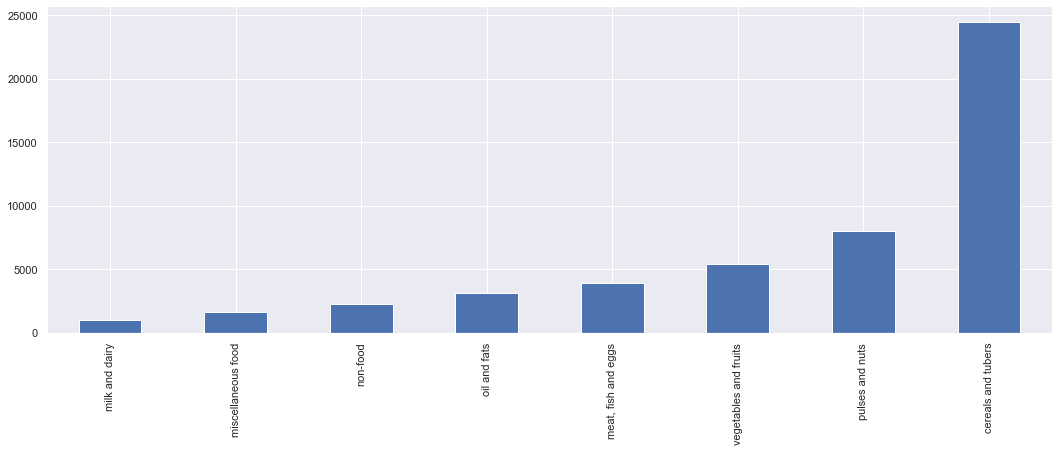

In [25]:
nfp['category'].value_counts(ascending= True).plot(kind='bar', figsize=(18, 6))

In [26]:
nfp['state'].value_counts()

Yobe       15400
Borno      14312
Kaduna      3000
Katsina     2677
Kano        1974
Jigawa      1824
Oyo         1810
Zamfara     1689
Kebbi       1675
Gombe       1675
Lagos       1561
Adamawa     1318
Sokoto       618
Abia         281
Name: state, dtype: int64

In [27]:
# %percentage contribution of each state
nfp['state'].value_counts(normalize=True)*100

Yobe       30.915004
Borno      28.730879
Kaduna      6.022403
Katsina     5.373991
Kano        3.962741
Jigawa      3.661621
Oyo         3.633517
Zamfara     3.390613
Kebbi       3.362509
Gombe       3.362509
Lagos       3.133657
Adamawa     2.645843
Sokoto      1.240615
Abia        0.564098
Name: state, dtype: float64

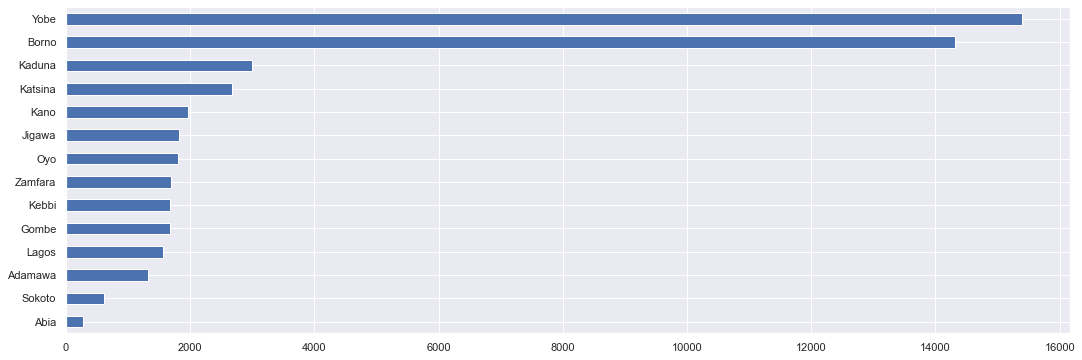

In [28]:
nfp['state'].value_counts(ascending= True).plot(kind='barh', figsize=(18, 6))

In [29]:
nfp['unit'].value_counts()

100 KG        12873
KG             9408
1.3 KG         4368
L              3308
1.4 KG         3304
1.2 KG         2575
750 ML         1992
400 G          1471
50 KG          1427
0.5 KG         1324
Unit           1152
20 G            988
30 pcs          966
2.1 KG          957
250 G           806
300 G           723
3.1 KG          515
1.1 KG          482
3.4 KG          468
1.5 KG          464
100 Tubers      164
100 L            79
Name: unit, dtype: int64

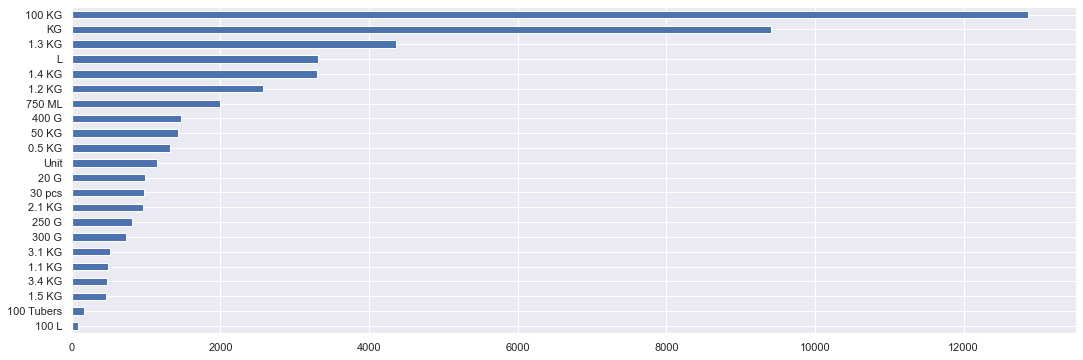

In [30]:
nfp['unit'].value_counts(ascending= True).plot(kind='barh', figsize=(18, 6))

In [31]:
nfp['city'].value_counts()

Potiskum                    2363
Dawanau                     1974
Ibadan                      1810
Maiduguri                   1755
Kaura Namoda                1689
Gombe                       1675
Gwandu                      1675
Dandume                     1592
Lagos                       1561
Giwa                        1555
Damaturu                    1535
Biu                         1495
Gujungu                     1487
Saminaka                    1445
Bullunkutu                  1334
Custom                      1333
Monday                      1332
Baga Road                   1330
Budum                       1330
Abba Gamaram                1326
Tashan Bama                 1324
Kusawam Shanu               1322
Mubi                        1318
Bade (Gashua)               1210
Nguru                       1210
Geidam                      1197
Damaturu (Sunday Market)    1185
Jakusko                     1174
Yunusari                    1172
Bursari                     1153
Yusufari  

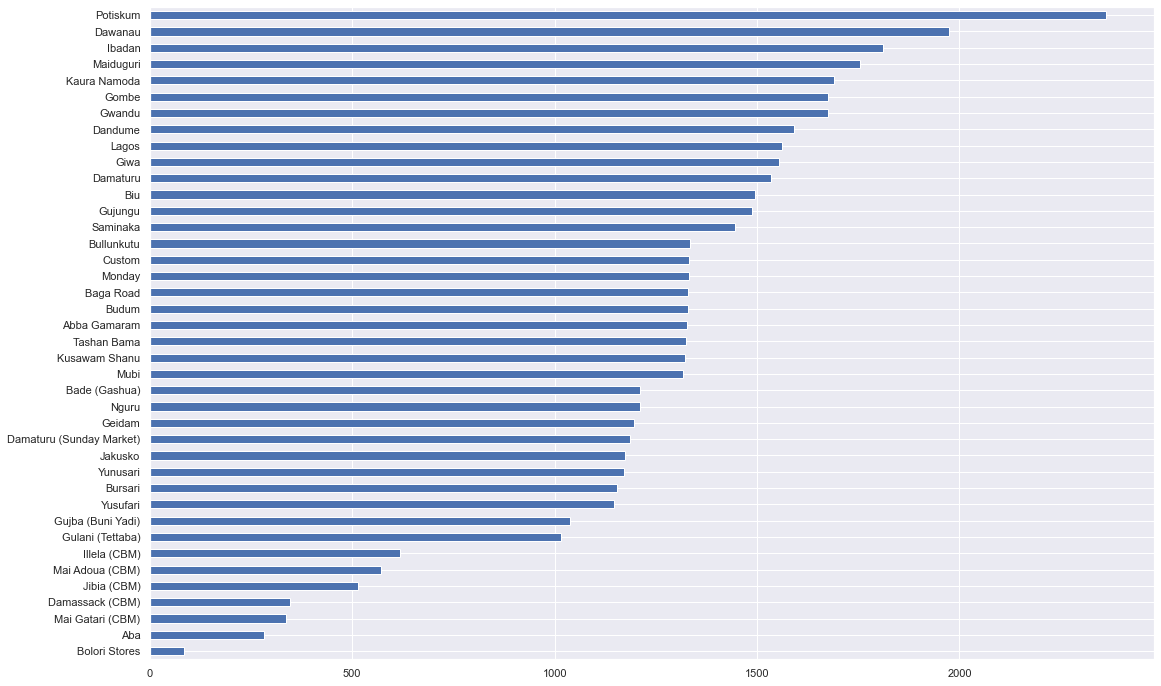

In [32]:
nfp['city'].value_counts(ascending= True).plot(kind='barh', figsize=(18, 12))

In [33]:
nfp['product'].value_counts()

Millet                         3158
Rice (imported)                2958
Rice (local)                   2421
Yam                            2265
Oil (palm)                     2132
Maize (white)                  1728
Sorghum (white)                1700
Sorghum                        1515
Cowpeas (white)                1479
Groundnuts (shelled)           1474
Gari (white)                   1447
Sorghum (brown)                1440
Maize (yellow)                 1406
Cowpeas (brown)                1379
Cassava meal (gari, yellow)    1238
Bread                          1152
Fuel (diesel)                  1134
Fuel (petrol-gasoline)         1129
Groundnuts                      997
Oil (vegetable)                 996
Maize flour                     993
Milk                            988
Onions                          988
Meat (goat)                     988
Meat (beef)                     988
Beans (white)                   983
Beans (red)                     982
Fish                        

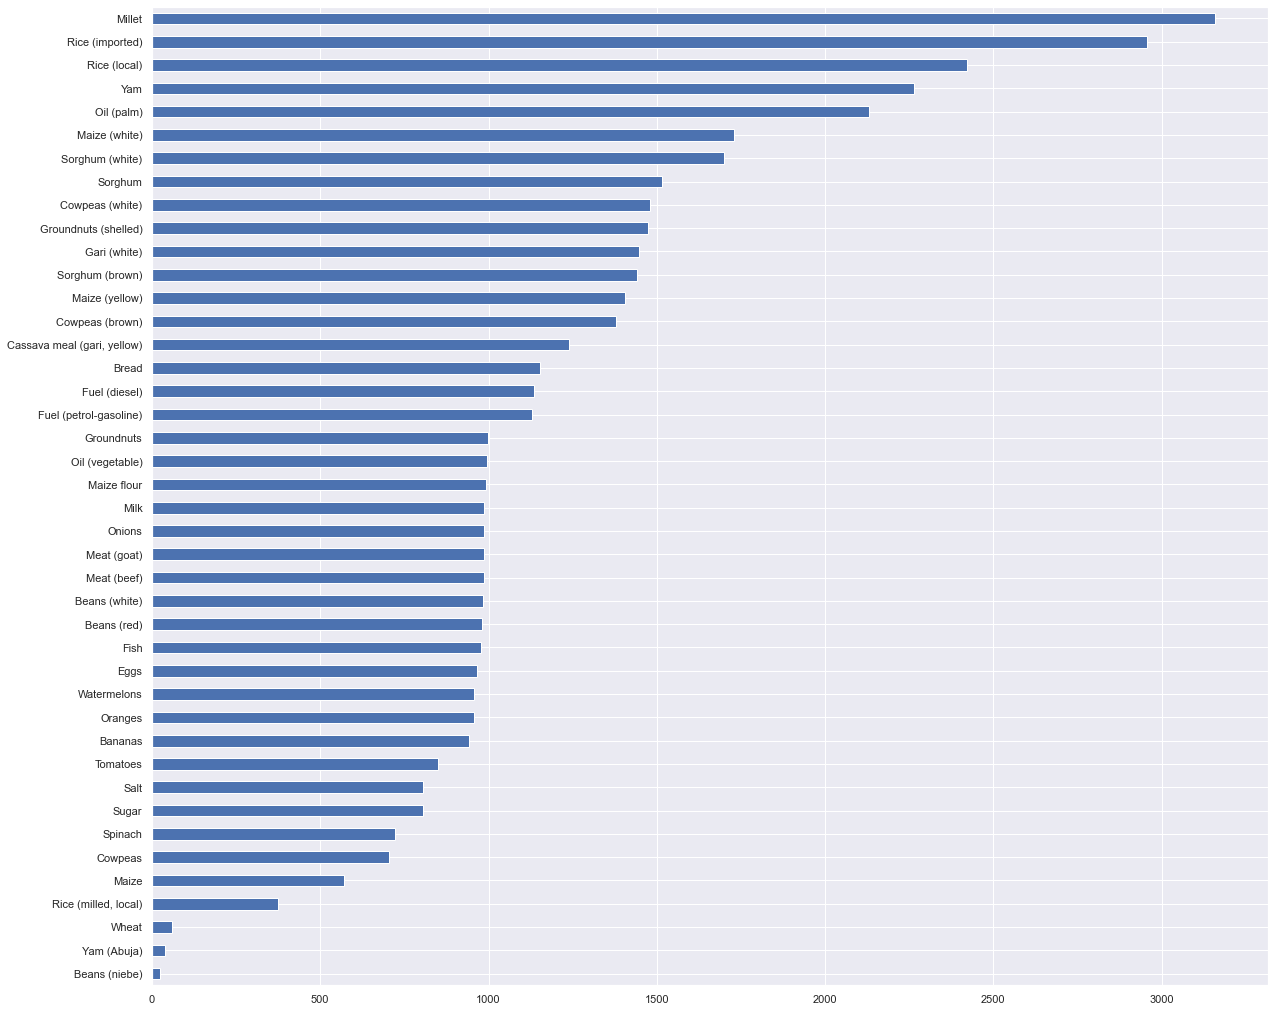

In [34]:
nfp['product'].value_counts(ascending= True).plot(kind='barh', figsize=(20, 18))

In [35]:
nfp['type'].value_counts()

Retail       32452
Wholesale    17362
Name: type, dtype: int64

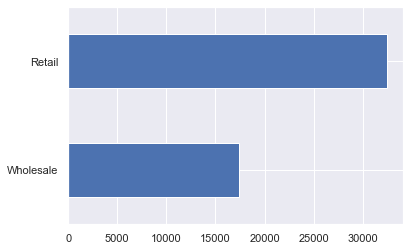

In [37]:
nfp['type'].value_counts(ascending= True).plot(kind='barh', figsize=(6, 4))

### Bivariate Exploration

In [38]:
nfp.groupby(['state', 'city']).describe()['price'].transpose()

state          Abia       Adamawa        Borno                                                                                                                                                               Gombe        Jigawa                         Kaduna                        Kano       Katsina                                     Kebbi         Lagos           Oyo       Sokoto          Yobe                                                                                                                                                                             Zamfara
city            Aba          Mubi Abba Gamaram    Baga Road           Biu Bolori Stores        Budum   Bullunkutu       Custom Damassack (CBM) Kusawam Shanu     Maiduguri       Monday  Tashan Bama         Gombe       Gujungu Mai Gatari (CBM)          Giwa      Saminaka       Dawanau       Dandume Jibia (CBM) Mai Adoua (CBM)        Gwandu         Lagos        Ibadan Illela (CBM) Bade (Gashua)      Bursari      Damaturu Damaturu (Sunday Market)       Geidam Gujba (Buni Yadi) Gulani (Tettaba)      Jakusko        Nguru      Potiskum     Yunusari     Yusufari  Kaura Namoda
count    281.000000   1318.000000  1326.000000  1330.000000   1495.000000     84.000000  1330.000000  1334.000000  1333.000000      347.000000   1322.000000   1755.000000  1332.000000  1324.000000   1675.000000   1487.000000       337.000000   1555.000000   1445.000000   1974.000000   1592.000000  515.000000      570.000000   1675.000000   1561.000000   1810.000000   618.000000   1210.000000  1153.000000   1535.000000              1185.000000  1197.000000       1038.000000      1016.000000  1174.000000  1210.000000   2363.000000  1172.000000  1147.000000   1689.000000
mean   11521.484447  10559.363956   445.889643   445.832691  10062.966856    622.553571   438.712984   463.333140   443.191083      244.591968    432.657410  11113.612669   444.940666   451.850052   9527.924675   8545.160968       234.543335  10265.121493   8654.448671   9353.923172   8750.123016  230.018719      217.413976  10619.424986  10476.118657  11007.311149   207.657807    366.762810   394.995230   9610.662853               390.251477   382.281119        389.391618       359.532972   386.318853   373.211570   4974.317710   387.646473   372.618134   9769.601927
std    15862.785099  11406.757124   359.981118   353.189623  11045.318204   1828.812660   358.145826   436.564588   361.698588      137.267840    345.827369  11245.633799   355.764131   362.981408   9460.272647  10569.290149       114.481254  11507.665059   9891.802685   9470.890555   9519.226077  118.374066      109.999232  12047.309252  10543.068090  11133.944857    88.544097    327.572105   349.437788  11466.682929               345.723887   347.152152        356.583924       335.645148   357.921336   335.056618   8790.183962   340.566229   333.619749   9667.129791
min       87.000000     22.000000     8.800000    10.000000     59.710500     10.000000    10.000000    10.000000    10.000000       75.166700      8.800000     87.500000    10.000000     5.000000     76.920000     58.140000        81.000000     66.670000     55.500000     54.024000     66.920000   73.076900       64.836900     72.728000     87.000000     59.210000    67.973400     10.000000    10.000000     28.000000                10.000000    10.000000         21.500000        20.000000    10.000000    10.000000     10.000000    10.000000    10.000000     65.451500
25%      173.500000    233.924250   170.000000   168.500000    253.678000    260.000000   170.000000   175.000000   167.000000      152.644650    165.500000    330.625000   164.000000   169.750000    300.000000    188.782500       157.298900    240.000000    222.500000    333.482475    240.000000  152.078050      143.321050    245.302150    336.985500    313.760625   149.222300    115.000000   120.000000    230.160000               110.000000   125.000000        123.125000       100.000000   120.000000   120.000000    197.708750   150.000000   

In [39]:
nfp.groupby(['state', 'category']).describe()['price'].transpose()

state                  Abia                                                      Adamawa                                                        Borno                                                                                                                                    Gombe                                                       Jigawa                                                       Kaduna                                                        Kano                                                     Katsina                                                       Kebbi                                                        Lagos                                                         Oyo                                                      Sokoto                               Yobe                                                                                                                                 Zamfara                                         
category cereals and tubers    non-food  oil and fats pulses and nuts cereals and tubers    non-food  oil and fats pulses and nuts cereals and tubers meat, fish and eggs milk and dairy miscellaneous food    non-food  oil and fats pulses and nuts vegetables and fruits cereals and tubers    non-food  oil and fats pulses and nuts cereals and tubers    non-food  oil and fats pulses and nuts cereals and tubers    non-food oil and fats pulses and nuts cereals and tubers    non-food oil and fats pulses and nuts cereals and tubers    non-food oil and fats pulses and nuts cereals and tubers    non-food  oil and fats pulses and nuts cereals and tubers    non-food oil and fats pulses and nuts cereals and tubers    non-food oil and fats pulses and nuts cereals and tubers pulses and nuts cereals and tubers meat, fish and eggs milk and dairy miscellaneous food    non-food oil and fats pulses and nuts vegetables and fruits cereals and tubers    non-food oil and fats pulses and nuts
count            135.000000   76.000000     40.000000        30.00000         874.000000  126.000000     63.000000      255.000000        5351.000000         1861.000000     473.000000         704.000000  296.000000   1110.000000     2190.000000           2327.000000        1120.000000  160.000000     80.000000      315.000000        1336.000000  160.000000     79.000000      249.000000        1994.000000  298.000000   149.000000      559.000000        1470.000000  150.000000    64.000000      290.000000        2126.000000  154.000000    77.000000      320.000000        1120.000000  160.000000     80.000000      315.000000        1075.000000  116.000000    76.000000      294.000000        1277.000000  161.000000    81.000000      291.000000         608.000000       10.000000        4813.000000         2060.000000     515.000000         907.000000  254.000000  1153.000000     2609.000000           3089.000000        1167.000000  152.000000    76.000000      294.000000
mean           15349.173822  151.551316   3749.094687     33463.89920       11041.571608  174.713730   3268.855735    15839.044182        4609.828470         1018.656720      60.446089         353.178125  174.342108    865.040635     5094.889505            178.506051        9524.772026  165.131844   2948.704585    15965.751427        6162.164360  186.311000   1810.301204    17591.246278        9485.350079  163.830721   820.576657    16785.450298        9206.927994  168.132333  2203.535245    16428.324431        4340.857698  164.169870   853.813022    15165.288189       10644.628891  169.301294   3103.398171    17746.642645        9674.197268  164.543578  2598.316033    19513.265598       11785.072969  164.095554   583.705784    16494.829713         206.220248      295.061390        3949.717521          869.684466      54.019417         439.540243  177.764104   466.045130     3353.824907            104.107964        9918.082634  166.109408   833.193054    16455.387481
std            15231.519820   41.447268   3838.099360     18689.81434   

In [40]:
nfp.groupby(['category', 'product', 'type']).describe()['price'].transpose()

category cereals and tubers                                                                                                                                                                                                                                                                                                                                                                                                                     meat, fish and eggs                                        milk and dairy miscellaneous food                   non-food                        oil and fats                               pulses and nuts                                                                                                                                                   vegetables and fruits                                                              
product               Bread Cassava meal (gari, yellow)               Gari (white)                     Maize Maize (white)               Maize (yellow)               Maize flour       Millet               Rice (imported)               Rice (local)               Rice (milled, local)     Sorghum             Sorghum (brown)               Sorghum (white)                     Wheat          Yam               Yam (Abuja)                              Eggs         Fish  Meat (beef)  Meat (goat)           Milk               Salt        Sugar Fuel (diesel) Fuel (petrol-gasoline)   Oil (palm)               Oil (vegetable)   Beans (niebe)  Beans (red) Beans (white)     Cowpeas Cowpeas (brown)               Cowpeas (white)                Groundnuts Groundnuts (shelled)                             Bananas      Onions      Oranges     Spinach    Tomatoes  Watermelons
type                 Retail                      Retail     Wholesale       Retail     Wholesale   Wholesale        Retail     Wholesale         Retail     Wholesale      Retail       Retail     Wholesale          Retail     Wholesale       Retail     Wholesale            Wholesale      Retail   Wholesale          Retail     Wholesale          Retail     Wholesale   Wholesale       Retail     Wholesale      Retail     Wholesale              Retail       Retail       Retail       Retail         Retail             Retail       Retail        Retail                 Retail       Retail     Wholesale          Retail       Wholesale       Retail        Retail      Retail          Retail     Wholesale          Retail     Wholesale      Retail               Retail     Wholesale                Retail      Retail       Retail      Retail      Retail       Retail
count           1152.000000                  330.000000    908.000000   363.000000   1084.000000  571.000000    358.000000   1370.000000     373.000000   1033.000000  993.000000  1317.000000   1841.000000     1281.000000   1677.000000  1361.000000   1060.000000           374.000000  939.000000  576.000000      355.000000   1085.000000      347.000000   1353.000000   61.000000  1743.000000    522.000000   17.000000     22.000000          966.000000   979.000000   988.000000   988.000000     988.000000         806.000000   805.000000   1134.000000            1129.000000  1603.000000    529.000000      996.000000       24.000000   982.000000    983.000000  703.000000      331.000000   1048.000000      357.000000   1122.000000  997.000000           372.000000   1102.000000            941.000000  988.000000   956.000000  723.000000  851.000000   957.000000
mean             281.057247                  265.689747  15394.861054   225.432058  13052.083924  172.500877    130.874683   9571.787937     132.513244  10573.218597  236.536254   179.758713   7557.394363      610.079000  10251.531416   416.798809  25474.803393         22931.452415  180.346645  156.478680      138.069943  11010.599871      138.071515  10195.413808  193.162674   427.140920  31634.804575  211.633659  14619.336364         1032.999333   419.741062  1126.300911  1179.839069      57.096154         208.377419   595.463602    199

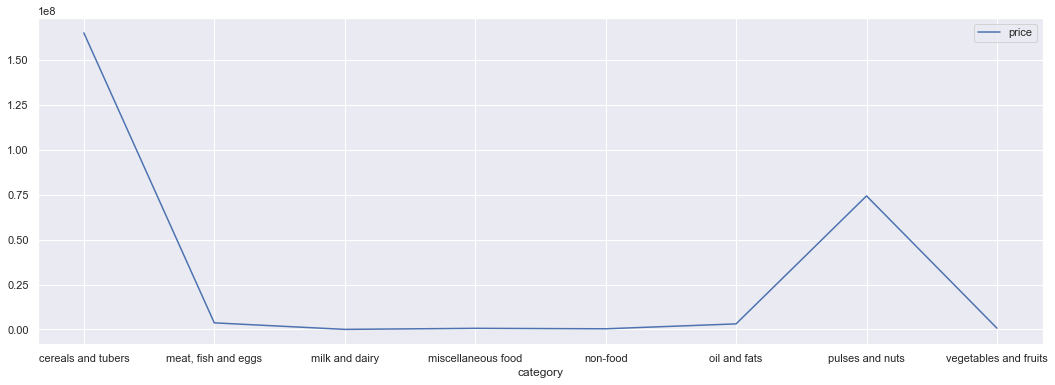

In [51]:
nfp.groupby('category').sum().reset_index().plot(y='price', x='category', figsize=(18, 6))

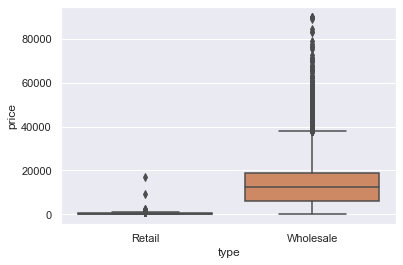

In [64]:
nfp.groupby('type').sum().reset_index()
sns.boxplot(data = nfp, y='price', x='type')

In [42]:
nfp.pivot_table(values=['price','unit'],index=['state','category'],aggfunc=['max', 'min', 'count', 'sum'])

max              min         count                 sum
                                    price   unit     price    unit price  unit         price
state   category                                                                            
Abia    cereals and tubers     59915.0000   Unit  100.0000  100 KG   135   135  2.072138e+06
        non-food                 257.7500      L   87.0000       L    76    76  1.151790e+04
        oil and fats           16500.0000      L  203.3325       L    40    40  1.499638e+05
        pulses and nuts        60277.5000     KG  557.4025  100 KG    30    30  1.003917e+06
Adamawa cereals and tubers     58000.0000   Unit   22.0000  100 KG   874   874  9.650334e+06
        non-food                 300.0000      L   86.5000       L   126   126  2.201393e+04
        oil and fats           15650.0000      L  351.0000   100 L    63    63  2.059379e+05
        pulses and nuts        41850.0000     KG  103.4000  100 KG   255   255  4.038956e+06
Borno   cereals and tubers     89000.0000   Unit   59.7105  1.3 KG  5351  5351  2.466719e+07
        meat, fish and eggs     2200.0000     KG   50.0000  1.5 KG  1861  1861  1.895720e+06
        milk and dairy          1000.0000   20 G   15.0000    20 G   473   473  2.859100e+04
        miscellaneous food      1000.0000  250 G   45.0000  1.3 KG   704   704  2.486374e+05
        non-food                 390.0000      L   87.0000       L   296   296  5.160526e+04
        oil and fats           19375.0000      L   10.0000   100 L  1110  1110  9.601951e+05
        pulses and nuts        48750.0000     KG   50.0000  1.1 KG  2190  2190  1.115781e+07
        vegetables and fruits   1388.0000  400 G    5.0000  0.5 KG  2327  2327  4.153836e+05
Gombe   cereals and tubers     43750.0000   Unit   76.9200  100 KG  1120  1120  1.066774e+07
        non-food                 269.0000      L   87.0000       L   160   160  2.642110e+04
        oil and fats           19250.0000      L  380.0000       L    80    80  2.358964e+05
        pulses and nuts        39250.0000     KG  133.3300  100 KG   315   315  5.029212e+06
Jigawa  cereals and tubers     65750.0000   Unit   58.1400  100 KG  1336  1336  8.232652e+06
        non-food                 700.0000      L   92.7500       L   160   160  2.980976e+04
        oil and fats           17375.0000      L  266.6600       L    79    79  1.430138e+05
        pulses and nuts        45100.0000     KG  137.2500  100 KG   249   249  4.380220e+06
Kaduna  cereals and tubers     83000.0000   Unit   55.5000  100 KG  1994  1994  1.891379e+07
        non-food                 270.0000      L   87.0000       L   298   298  4.882156e+04
        oil and fats            5100.0000      L  196.0000       L   149   149  1.222659e+05
        pulses and nuts        55500.0000     KG   94.4400  100 KG   559   559  9.383067e+06
Kano    cereals and tubers     46150.0000   Unit   54.0240  100 KG  1470  1470  1.353418e+07
        non-food                 251.5000      L   87.0000       L   150   150  2.521985e+04
        oil and fats            7340.0000      L  338.0000       L    64    64  1.410263e+05
        pulses and nuts        42085.0000     KG   91.6910  100 KG   290   290  4.764214e+06
Katsina cereals and tubers     50666.6667   Unit   64.8369  100 KG  2126  2126  9.228663e+06
        non-food                 263.0000      L   87.0000       L   154   154  2.528216e+04
        oil and fats            3340.0000      L  332.1380       L    77    77  6.574360e+04
        pulses and nuts        48050.0000     KG  104.5700  100 KG   320   320  4.852892e+06
Kebbi   cereals and tubers     84600.0000   Unit   72.7280  100 KG  1120  1120  1.192198e+07
        non-food                 281.0000      L   94.1000       L   160   160  2.708821e+04
        oil and fats           14715.0000      L  338.6667       L    80    80  2.482719e+05
        pulses and nuts        52450.0000     KG  161.6187  100 KG   315   315  5.590192e+06
Lagos   cereals and tubers     52000.00

Text(0, 0.5, 'Price')

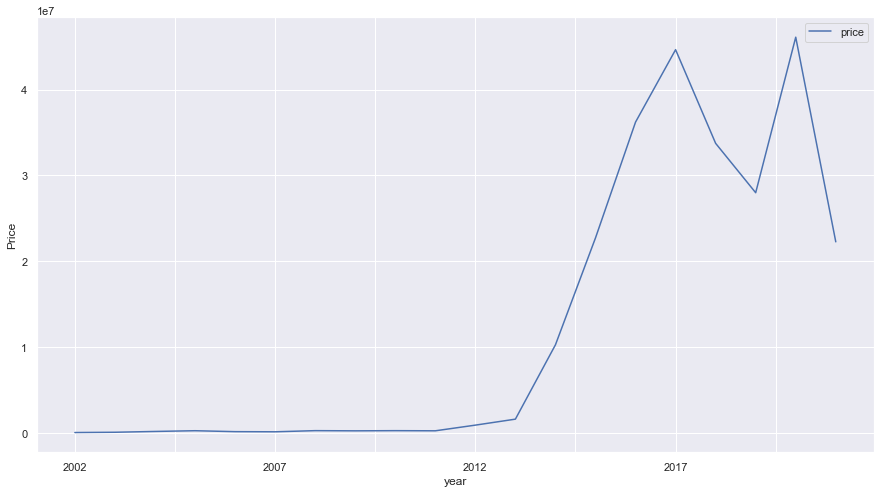

In [47]:
# Plot trend year-on-year
nfp.groupby('year').sum().reset_index().plot(y='price', x='year',  figsize=(15,8))
plt.ylabel('Price')